### 가정
- 수소차 충전소 위치는 변수~변수 만 고려하여 위치를 선정.
- 기존 설치된 수소차 충전소는 위 고려사항을 충분히 고려하여 만들어진 곳이다.
- 수소차 충전소는 전방 약 ~m를 커버할 수 있다.

### 분석 방법
- 고려되는 모든 변수들은 정규화
- 선형회귀분석을 이용해 구한 데이터로부터 수소차 충전소 위치에 영향을 주는 요소의 관계를 분석(Linear Regression)
- INPUT : 차량등록수, 생산가능인구수, 교통노드,	건물연면적, 관광상권, 부동산상권,	생활서비스상권,	소매상권, 숙박상권,	스포츠상권, 음식상권, 학문상권, 유치원초중고, 화재발생건수, 교통량
         
- OUTPUT : 고려되는 요소들과 충전소 사이의 상관계수


### 1.데이터 불러오기

In [1]:
import pandas as pd
df=pd.read_csv("C:/Users/Kim Won Gyeung/Desktop/공모전/2021 빅데이터 분석 및 아이디어 공모전/2.사용_데이터(정제데이터)/4. 선형회귀 돌릴 데이터/1km/gid_1km(0제외).csv", encoding ="cp949")

In [2]:
df = df.iloc[:,1:]

In [3]:
df

,차량등록수,생산가능인구수,교통노드,건물연면적,관광상권,부동산상권,생활서비스상권,소매상권,숙박상권,스포츠상권,음식상권,학문상권,유치원초중고,화재발생건수,교통량,종속변수_수소차
0,0,95,0,1037.35,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0.00,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20012,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0
20013,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0
20014,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0
20015,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0


### 1-1. EDA (이상치 확인하기)

In [4]:
df.columns

Index(['차량등록수', '생산가능인구수', '교통노드', '건물연면적', '관광상권', '부동산상권', '생활서비스상권', '소매상권',
       '숙박상권', '스포츠상권', '음식상권', '학문상권', '유치원초중고', '화재발생건수', '교통량', '종속변수_수소차'],
      dtype='object')

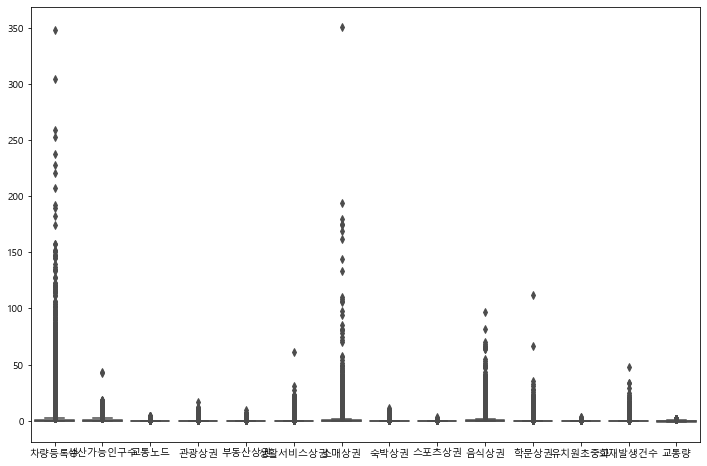

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_path = 'c://Windows//Fonts//malgun.ttf' # 폰트 파일 위치
font_name = font_manager.FontProperties( fname = font_path ).get_name()
rc( 'font', family = font_name )


#warning 메시지 표시 안하게 하기
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12,8))
sns.boxplot(data = df[['차량등록수', '생산가능인구수', '교통노드', '관광상권','부동산상권', '생활서비스상권', '소매상권', '숙박상권', '스포츠상권', '음식상권', '학문상권', '유치원초중고','화재발생건수', '교통량']],color='red')
plt.show()

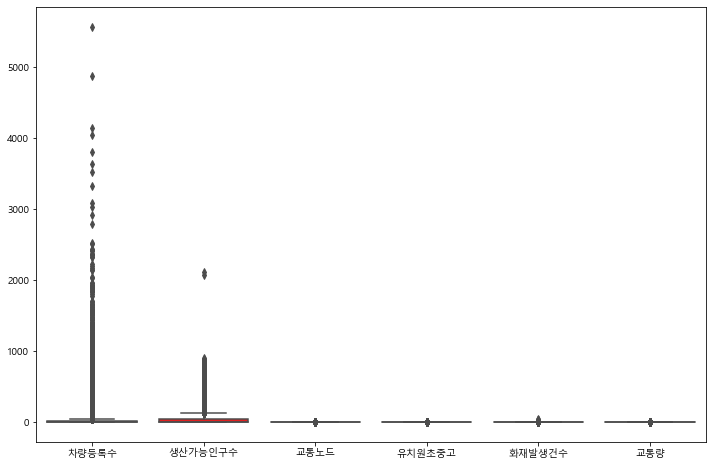

In [6]:
# 상권 제외 이상치 확인
plt.figure(figsize=(12,8))
sns.boxplot(data = df[['차량등록수', '생산가능인구수', '교통노드','유치원초중고','화재발생건수', '교통량']],color='red')
plt.show()

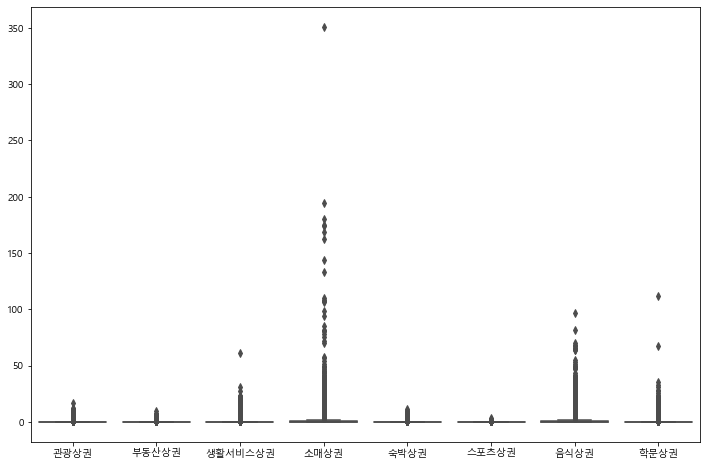

In [7]:
# 상권 이상치 확인
plt.figure(figsize=(12,8))
sns.boxplot(data = df[['관광상권','부동산상권', '생활서비스상권', '소매상권', '숙박상권', '스포츠상권', '음식상권', '학문상권']],color='red')
plt.show()

### 2. 데이터 정규화
참고 사이트 : https://rfriend.tistory.com/269

#### 범주형 x값 
교통량, 교통노드 

In [5]:
# 이상치에 영향을 받지 않는 RobustScaler
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
df.iloc[:,:-1] = robust_scaler.fit_transform(df.iloc[:,:-1])

In [9]:
# # 이상치에 영향을 받지 않는 StandardScaler
# from sklearn.preprocessing import StandardScaler
# standard_scaler = StandardScaler()
# standard_x = standard_scaler.fit_transform(df.iloc[:,:-1])

In [10]:
# MinMaxScaler 전처리 (이상치에 영향을 받는다.)
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df.iloc[:,3:-1]=scaler.fit_transform(df.iloc[:,3:-1])

In [6]:
df['종속변수_수소차'].value_counts()

0    17990
1     2027
Name: 종속변수_수소차, dtype: int64

### 3. 회귀분석

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

X = df.iloc[:,:-1] # 독립변수
y = df.iloc[:,-1] # 종속변수
reg = linear_model.LinearRegression()
reg.fit(X,y)

H_coeff = reg.coef_
print('수소차충전소 Intercept: ', reg.intercept_)
print('수소차충전소 Coefficients: \n', H_coeff)

수소차충전소 Intercept:  0.16938555384126963
수소차충전소 Coefficients: 
 [ 3.32709191e-06 -2.82194113e-04  7.52450685e-03 -1.92234624e-06
  1.62168371e-03  4.15445383e-03 -4.92525681e-03  1.19493186e-04
 -1.36675290e-02  1.04869561e-02 -2.69868911e-03  7.22600769e-04
 -5.63680256e-02 -4.65454038e-03 -5.61896799e-02]


### 4. LinearSVC 예측력 확인하기 및 coef 계산

In [25]:
score = []
for i in range(0,100):
    np.random.seed(i) 

    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2)
    
    mlr = LinearSVC()
    mlr.fit(x_train,y_train)
    score.append(mlr.score(x_test,y_test))
score.index(max(score))

56

In [26]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(56) # 607 : 0.9348029725847748, 1114 : 0.9394242178230188, 1001 : 0.9291200899269344, 1205 : 0.9436707675014051

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2)

In [27]:
from sklearn.svm import LinearSVC

X = x_train
y = y_train

linear_svc = LinearSVC().fit(X,y)

H_svc_coeff = linear_svc.coef_
print('수소차충전소 intercept: ', linear_svc.intercept_)
print('수소차충전소 Coefficients: \n', H_svc_coeff)

수소차충전소 intercept:  [-0.75750349]
수소차충전소 Coefficients: 
 [[-0.00990689 -0.05162768  0.03707279 -0.02609255  0.03020646  0.03296484
  -0.00763582 -0.00646448 -0.0459109   0.10484452 -0.00840296 -0.01393862
  -0.11139121 -0.0354072  -0.16546761]]


In [28]:
from sklearn.svm import LinearSVC

mlr = LinearSVC()
mlr.fit(x_train,y_train)

LinearSVC()

In [29]:
y_predict = mlr.predict(x_test)

In [30]:
print(mlr.score(x_test,y_test))

0.9090909090909091


### 5. LPG 버퍼 데이터(2km) 점수 내기

In [31]:
import pandas as pd
lpg_buffer=pd.read_csv("C:/Users/Kim Won Gyeung/Desktop/공모전/2021 빅데이터 분석 및 아이디어 공모전/2.사용_데이터(정제데이터)/1.QGIS에 사용할 데이터(gid 가능데이터)/gid포함 csv파일/수소차버퍼, lpg버퍼 격자데이터/lpg버퍼격자 1km.csv",encoding='cp949')
lpg_buffer = lpg_buffer[['소재지','gid']]
include_0_df = pd.read_csv("C:/Users/Kim Won Gyeung/Desktop/공모전/2021 빅데이터 분석 및 아이디어 공모전/2.사용_데이터(정제데이터)/4. 선형회귀 돌릴 데이터/1km/gid_1km.csv",encoding='cp949')


In [32]:
lpg_buffer

,소재지,gid
0,대전 대덕구 상서동 441-3,다바931257
1,대전 대덕구 상서동 441-3,다바919249
2,대전 대덕구 상서동 441-3,다바926248
3,대전 대덕구 상서동 441-3,다바931256
4,대전 대덕구 상서동 441-3,다바924241
...,...,...
13227,대전 중구 중촌동 413-43,다바912161
13228,대전 중구 중촌동 413-43,다바917165
13229,대전 중구 중촌동 413-43,다바913167
13230,대전 중구 중촌동 413-43,다바914164


In [33]:
gid1 = lpg_buffer.merge(include_0_df,on='gid',how='inner')
gid1

,소재지,gid,차량등록수,생산가능인구수,교통노드,건물연면적,관광상권,부동산상권,생활서비스상권,소매상권,숙박상권,스포츠상권,음식상권,학문상권,유치원초중고,화재발생건수,congestion,종속변수_수소차
0,대전 대덕구 상서동 441-3,다바931257,27,0,0,549.38,0,0,0,2,0,0,0,0,0,0,1.0,1.0
1,대전 대덕구 상서동 349-12,다바931257,27,0,0,549.38,0,0,0,2,0,0,0,0,0,0,1.0,1.0
2,대전 대덕구 상서동 440,다바931257,27,0,0,549.38,0,0,0,2,0,0,0,0,0,0,1.0,1.0
3,대전 대덕구 평촌동 226-5,다바931257,27,0,0,549.38,0,0,0,2,0,0,0,0,0,0,1.0,1.0
4,대전 대덕구 상서동 236-32,다바931257,27,0,0,549.38,0,0,0,2,0,0,0,0,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13227,대전 중구 석교동 17-2,다바944122,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0.0,0.0
13228,대전 중구 석교동 17-2,다바944117,9,8,0,0.00,0,0,0,0,0,0,0,0,0,0,0.0,0.0
13229,대전 중구 석교동 17-2,다바952128,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0.0,0.0
13230,대전 중구 석교동 17-2,다바953127,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0.0,0.0


In [34]:
address=gid1['소재지'].unique()

In [35]:
for index,i in enumerate(address):
    globals()['LPG_{}'.format(index)] = gid1[gid1['소재지']==i].iloc[:,:-1]

In [36]:
LPG_0

,소재지,gid,차량등록수,생산가능인구수,교통노드,건물연면적,관광상권,부동산상권,생활서비스상권,소매상권,숙박상권,스포츠상권,음식상권,학문상권,유치원초중고,화재발생건수,congestion
0,대전 대덕구 상서동 441-3,다바931257,27,0,0,549.38,0,0,0,2,0,0,0,0,0,0,1.0
5,대전 대덕구 상서동 441-3,다바919249,18,0,0,913.10,0,0,0,0,0,0,0,0,0,0,1.0
6,대전 대덕구 상서동 441-3,다바926248,3,0,0,598.50,0,0,0,0,0,0,0,0,0,0,1.0
10,대전 대덕구 상서동 441-3,다바931256,5,0,0,600.84,0,0,0,0,0,0,0,0,0,0,0.0
15,대전 대덕구 상서동 441-3,다바924241,17,0,0,336.42,0,0,1,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,대전 대덕구 상서동 441-3,다바931245,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0.0
977,대전 대덕구 상서동 441-3,다바923256,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0.0
981,대전 대덕구 상서동 441-3,다바933246,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0.0
984,대전 대덕구 상서동 441-3,다바929241,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1.0


### 3. 각 LPG버퍼의 평균값 생성

각 변수 별 기울기 예시 : 
[ 0.0055057   0.00528903 -0.00455832 -0.00287307 -0.74386752 -0.22222152
   0.0703922  -0.27240484 -0.4563973  -0.46641819 -0.05133648 -0.73558932
  -0.74722167 -0.1683216  -1.0224718 ]

In [37]:
coef=[-0.00990689, -0.05162768,  0.03707279, -0.02609255,  0.03020646,  0.03296484,
  -0.00763582, -0.00646448, -0.0459109,   0.10484452, -0.00840296, -0.01393862,
  -0.11139121, -0.0354072,  -0.16546761]

In [38]:
import numpy as np
score_df = {'address':address,
           'score':np.zeros(46)}
score = pd.DataFrame(score_df)
score

,address,score
0,대전 대덕구 상서동 441-3,0.0
1,대전 대덕구 상서동 349-12,0.0
2,대전 대덕구 상서동 440,0.0
3,대전 대덕구 평촌동 226-5,0.0
4,대전 대덕구 상서동 236-32,0.0
5,대전 대덕구 대화동 16-140,0.0
6,대전 대덕구 대화동 3-1,0.0
7,대전 대덕구 읍내동 511,0.0
8,대전 대덕구 오정동 432-1,0.0
9,대전 대덕구 오정동 478-4,0.0


In [39]:
for i in range(46):
    score['score'][i]=sum(globals()['LPG_{}'.format(i)].mean()*coef)

In [40]:
score.sort_values('score',ascending=False)

,address,score
43,대전 유성구 방동 474-4,-0.657037
41,대전 유성구 송정동 300-1,-0.971154
38,대전 유성구 갑동 404,-1.389955
39,대전 유성구 갑동 398,-3.331603
44,대전 중구 안영동 280,-4.122719
22,대전 동구 구도동 366,-4.944093
1,대전 대덕구 상서동 349-12,-7.604828
23,대전 동구 삼정동 118-11,-7.702357
2,대전 대덕구 상서동 440,-8.110478
4,대전 대덕구 상서동 236-32,-8.413009


In [41]:
score.to_csv('C:/Users/Kim Won Gyeung/Desktop/공모전/2021 빅데이터 분석 및 아이디어 공모전/4. 결론 1 최종 버퍼별 순위 csv+top20 geojson/1km 순위 2.csv',encoding='cp949')